## PHYS2921 Experimental Analysis

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from itertools import cycle

### Sample 0.5mm 0%

#### Explantion of code:
This code reads in the raw data which has rows of intensity at different levels of angular dependence for the data. In the folder titled ```RawData``` there exists files which are named according the the following structure:

**thickness_percentage-down-shifter.csv**

As specified, each file contains the intensity measurement for different wavelengths at different angles from 0$^\circ$. 

The structure of the raw data looks something like this:
![](data_structure.png)

The code below does the following for one file **05mm_0percent.csv:**
* reads in the file into a dataframe 
* if the `absolute` flag is set to False, then the code normalises the data. If not, the code simply plots the data.
* The normalisation does the following:
    * Drops the first 135 rows corresponding to wavelengths 340-400
    * for these wavelengths, the intensity of the source light is far greater than that of any scattering
    * Smooth out the data using the pandas rolling mean function
    * drops rows 630 onward
    * plots the data, labeling the expected excitation
    

<Figure size 432x288 with 0 Axes>

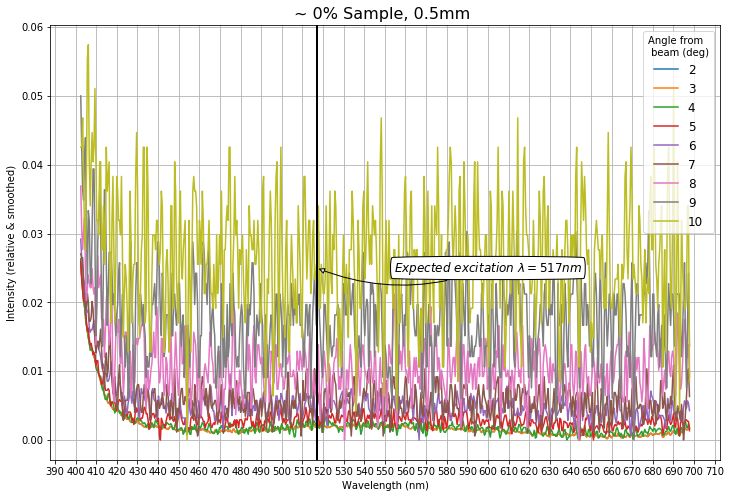

In [7]:
one_percent = pd.read_csv('./05mm_0percent.csv')
absolute = False
df050 = one_percent
df050.set_index('wavelength', inplace=True)

# drop the first 135 rows. In our data, this corresponds to wavelengths 340-400nm. 
# for these wavelengths, the intensity of the source light is far greater than that of any scattering
df050 = df050.drop(df050.index[0:135])

# smoothing: Here the rolling(number, center=True).mean() changes the intensity values for the rows to being the mean of the 
# *number* value rows. If the number value is higher, this allows for more smoothing
for column in df050.columns:
    df050[column] = df050[column].rolling(2, center=True).mean()
    
# Now we normalise between 0 and 1 for the remaining values. Each column is normalised on its own. This means that
# if the intensity for 7degrees is larger than that of 1, this means only relative to the rest of the wavelengths
if not absolute:
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    for column in df050.columns:
        df050[column] = preprocessing.minmax_scale(df050[column], feature_range=(0, 1), axis=0, copy=True)
plt.clf()
plt.figure(figsize=(12,8))

# drop rows 630 onward corresponding the wavelengths 630nm. 
df050 = df050.drop(df050.index[630:])

# save normalised data as a CSV
df050.to_csv("./NormalisedData/05mm_0percent_normalised.csv")

for column in df050.columns[0:11]:
    plt.plot(df050.index, df050[column], label=column)
plt.ylabel('Intensity (relative & smoothed)')
plt.xlabel('Wavelength (nm)')
plt.title('~ 0% Sample, 0.5mm ',fontsize=16)

plt.legend(prop={'size': 12},title='Angle from \n beam (deg)')
ax = plt.gca()
ax.grid(True)
# ax.axhline(0, color='black', lw=2)
ax.axvline(517, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
plt.annotate(r'$Expected \ excitation \ \lambda = 517nm$',
                  xy=(517, df050['9'].max()/2),
                  xytext=(600, df050['9'].max()/2),
                  size=12, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),
                  )
plt.show()

### 0.5mm 0.5% 
Here we repeat the process for 0.5mm 0.5% downshifter.

<Figure size 432x288 with 0 Axes>

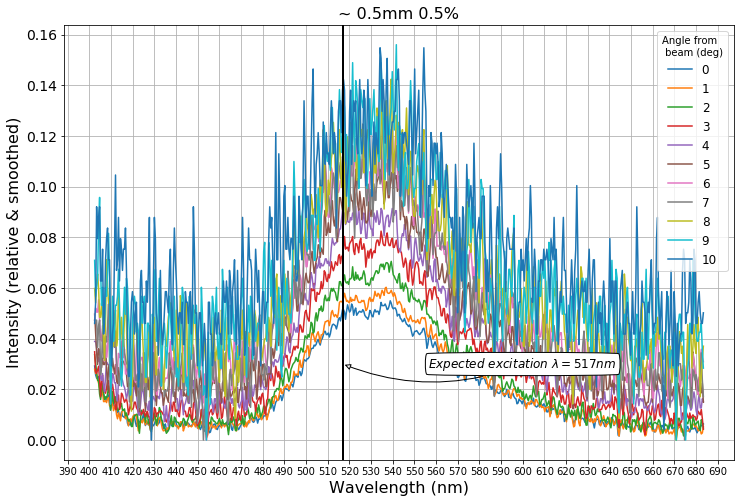

In [9]:
one_percent = pd.read_csv('./05mm_05percent.csv')
absolute = False
df0505 = one_percent
df0505.set_index('wavelength', inplace=True)

df0505 = df0505.drop(df0505.index[0:135])

for column in df0505.columns:
    df0505[column] = df0505[column].rolling(2, center=True).mean()
if not absolute:
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    for column in df0505.columns:
        df0505[column] = preprocessing.minmax_scale(df0505[column], feature_range=(0, 1), axis=0, copy=True)
plt.clf()
plt.figure(figsize=(12,8))

df0505 = df0505.drop(df0505.index[600:])

# save normalised data as a CSV
df0505.to_csv("./NormalisedData/05mm_05percent_normalised.csv")


for column in df0505.columns[0:11]:
    plt.plot(df0505.index, df0505[column], label=column)
plt.ylabel('Intensity (relative & smoothed)')
plt.xlabel('Wavelength (nm)')
plt.title('~ 0.5mm 0.5%',fontsize=16)
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.legend(prop={'size': 12},title='Angle from \n beam (deg)')
ax = plt.gca()
ax.grid(True)
# ax.axhline(0, color='black', lw=2)
ax.axvline(517, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
plt.annotate(r'$Expected \ excitation \ \lambda = 517nm$',
                  xy=(517, 0.03),
                  xytext=(600, 0.03),
                  size=12, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),
                  )
plt.show()

### 0.5mm 1%

In [ ]:
one_percent = pd.read_csv('./05mm_1percent.csv')
absolute = False
df1 = one_percent
df1.set_index('wavelength', inplace=True)
# to_drop = df3.index[0:150] + df3.index[500:]
if not absolute:
    df1 = df1.drop(df1.index[0:135])
# df3 = df3.drop(df3.index[630:])
for column in df1.columns:
    df1[column] = df1[column].rolling(2, center=True).sum()
if not absolute:
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    for column in df1.columns:
        df1[column] = preprocessing.minmax_scale(df1[column], feature_range=(0, 1), axis=0, copy=True)
plt.clf()
plt.figure(figsize=(12,8))
if not absolute:
    df1 = df1.drop(df1.index[630:])

# save normalised data as a CSV
df1.to_csv("./NormalisedData/05mm_1percent_normalised.csv")

lines = ["-","--","-.",":"]
linecycler = cycle(lines)
for column in df1.columns[0:11]:
    label = column + '$^{\circ}$'
    plt.plot(df1.index, df1[column],next(linecycler), label=label)
plt.ylabel('Intensity (relative)')
plt.xlabel('Wavelength (nm)')
if absolute:
    plt.title('Not normalised',fontsize=11)
else:
    plt.title('Normalised using 2nd order diffraction peak',fontsize=11)
plt.suptitle('1% sample, 0.5mm',fontsize=14, y=1)

plt.legend(prop={'size': 12},title='Angle from \n beam (deg)')
ax = plt.gca()
ax.grid(True)
# ax.axhline(0, color='black', lw=2)
ax.axvline(517, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
if absolute:
    middle = '0'
    xy_text = 650
else:
    middle = '10'
    xy_text = 625
plt.annotate(r'$Expected \ emission \ \lambda = 517nm$',
                  xy=(517, df1[middle].max()/2),
                  xytext=(xy_text, df1[middle].max()/2),
                  size=12, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),
                  )
if absolute:
    plt.annotate(r'$Excitation \ \lambda_{ex} = 365nm$',
                      xy=(365, df1['0'].max()/2),
                      xytext=(450, df1['0'].max()/2),
                      size=12, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="w"),
                      arrowprops=dict(arrowstyle="-|>",
                                      connectionstyle="arc3,rad=-0.2",
                                      fc="w"),
                      )
    plt.annotate(r'$2^{nd} \ order \ diffraction$',
                      xy=(730, 2000),
                      xytext=(750, (df1['0'].max()/2)*0.8),
                      size=12, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="w"),
                      arrowprops=dict(arrowstyle="-|>",
                                      connectionstyle="arc3,rad=-0.2",
                                      fc="w"),
                      )
plt.show()

### 1mm 0.5%

In [ ]:
one_percent = pd.read_csv('./1mm_05percent.csv')
absolute = False
df105 = one_percent
df105.set_index('wavelength', inplace=True)
# to_drop = df3.index[0:150] + df3.index[500:]
if not absolute:
    df105 = df105.drop(df105.index[0:135])
# df3 = df3.drop(df3.index[630:])
for column in df105.columns:
    df105[column] = df105[column].rolling(2, center=True).sum()
if not absolute:
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    for column in df105.columns:
        df105[column] = preprocessing.minmax_scale(df105[column], feature_range=(0, 1), axis=0, copy=True)
plt.clf()
plt.figure(figsize=(12,8))
if not absolute:
    df105 = df105.drop(df105.index[630:])

# save normalised data as a CSV
df105.to_csv("./NormalisedData/1mm_05percent_normalised.csv")

lines = ["-","--","-.",":"]
linecycler = cycle(lines)
for column in df105.columns[0:11]:
    label = column + '$^{\circ}$'
    plt.plot(df105.index, df105[column],next(linecycler), label=label)
plt.ylabel('Intensity (relative)')
plt.xlabel('Wavelength (nm)')
if absolute:
    plt.title('Not normalised',fontsize=11)
else:
    plt.title('Normalised using 2nd order diffraction peak',fontsize=11)
plt.suptitle('0.5% sample, 1mm',fontsize=14, y=1)

plt.legend(prop={'size': 12},title='Angle from \n beam (deg)')
ax = plt.gca()
ax.grid(True)
# ax.axhline(0, color='black', lw=2)
ax.axvline(517, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
if absolute:
    middle = '0'
    xy_text = 650
else:
    middle = '10'
    xy_text = 625
plt.annotate(r'$Expected \ emission \ \lambda = 517nm$',
                  xy=(517, df105[middle].max()/2),
                  xytext=(xy_text, df105[middle].max()/2),
                  size=12, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),
                  )
if absolute:
    plt.annotate(r'$Excitation \ \lambda_{ex} = 365nm$',
                      xy=(365, df105['0'].max()/2),
                      xytext=(450, df105['0'].max()/2),
                      size=12, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="w"),
                      arrowprops=dict(arrowstyle="-|>",
                                      connectionstyle="arc3,rad=-0.2",
                                      fc="w"),
                      )
    plt.annotate(r'$2^{nd} \ order \ diffraction$',
                      xy=(730, 2000),
                      xytext=(750, (df105['0'].max()/2)*0.8),
                      size=12, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="w"),
                      arrowprops=dict(arrowstyle="-|>",
                                      connectionstyle="arc3,rad=-0.2",
                                      fc="w"),
                      )
plt.show()

### 1mm 1%

<Figure size 432x288 with 0 Axes>

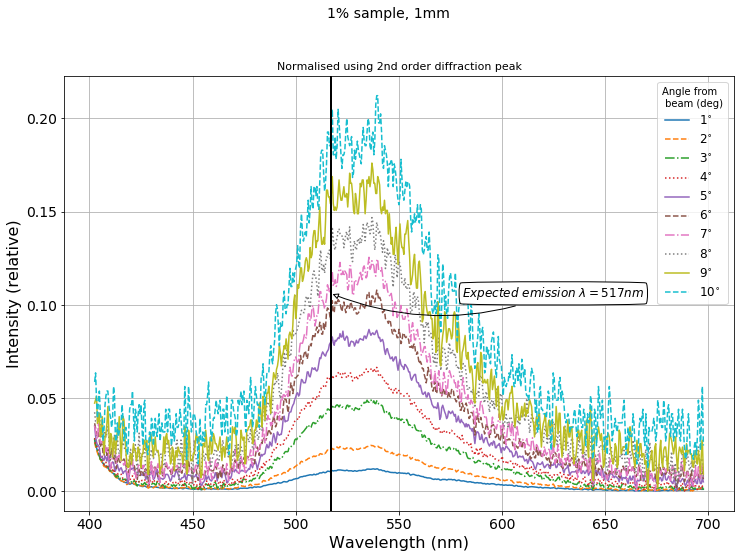

In [14]:
one_percent = pd.read_csv('./1mm_1percent.csv')
absolute = False
df11 = one_percent
df11.set_index('wavelength', inplace=True)

if not absolute:
    df11 = df11.drop(df11.index[0:135])

for column in df11.columns:
    df11[column] = df11[column].rolling(2, center=True).sum()
if not absolute:
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    for column in df11.columns:
        df11[column] = preprocessing.minmax_scale(df11[column], feature_range=(0, 1), axis=0, copy=True)
plt.clf()
plt.figure(figsize=(12,8))
if not absolute:
    df11 = df11.drop(df11.index[630:])

# save normalised data as a CSV
df11.to_csv("./NormalisedData/1mm_1percent_normalised.csv")

lines = ["-","--","-.",":"]
linecycler = cycle(lines)
for column in df11.columns[0:11]:
    label = column + '$^{\circ}$'
    plt.plot(df11.index, df11[column],next(linecycler), label=label)
plt.ylabel('Intensity (relative)')
plt.xlabel('Wavelength (nm)')
if absolute:
    plt.title('Not normalised',fontsize=11)
else:
    plt.title('Normalised using 2nd order diffraction peak',fontsize=11)
plt.suptitle('1% sample, 1mm',fontsize=14, y=1)

plt.legend(prop={'size': 12},title='Angle from \n beam (deg)')
ax = plt.gca()
ax.grid(True)
# ax.axhline(0, color='black', lw=2)
ax.axvline(517, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
if absolute:
    middle = '0'
    xy_text = 650
else:
    middle = '10'
    xy_text = 625
plt.annotate(r'$Expected \ emission \ \lambda = 517nm$',
                  xy=(517, df11[middle].max()/2),
                  xytext=(xy_text, df11[middle].max()/2),
                  size=12, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),
                  )
if absolute:
    plt.annotate(r'$Excitation \ \lambda_{ex} = 365nm$',
                      xy=(365, df11['0'].max()/2),
                      xytext=(450, df11['0'].max()/2),
                      size=12, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="w"),
                      arrowprops=dict(arrowstyle="-|>",
                                      connectionstyle="arc3,rad=-0.2",
                                      fc="w"),
                      )
    plt.annotate(r'$2^{nd} \ order \ diffraction$',
                      xy=(730, 2000),
                      xytext=(750, (df11['0'].max()/2)*0.8),
                      size=12, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="w"),
                      arrowprops=dict(arrowstyle="-|>",
                                      connectionstyle="arc3,rad=-0.2",
                                      fc="w"),
                      )
plt.show()

#### Angle dependence Visualised

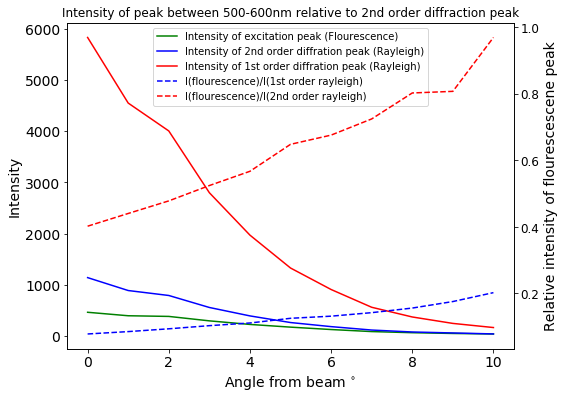

In [15]:
one_percent = pd.read_csv('./05mm_1percent.csv')
absolute = True
df3 = one_percent
df3.set_index('wavelength', inplace=True)
df3 = df3.drop(df3.index[0:135])

#excitation peak
mask = df3.index >=500
df3 = df3[mask]
mask = df3.index <=600
df3 = df3[mask]
angles = []
intensities = []
for column in df3.columns[0:11]:
    index = df3[[column]].idxmax()
    angles.append(column)
    intensities.append(df3.loc[index, column])

# 2nd order peak
one_percent = pd.read_csv('./05mm_1percent.csv')
df3 = one_percent
df3.set_index('wavelength', inplace=True)
mask = df3.index >=630
df3 = df3[mask]
intensities_2nd_order = []
for column in df3.columns[0:11]:
    index = df3[[column]].idxmax()
    intensities_2nd_order.append(df3.loc[index, column])

# 1st order peak
one_percent = pd.read_csv('./05mm_1percent.csv')
df3 = one_percent
df3.set_index('wavelength', inplace=True)
mask = df3.index <400
df3 = df3[mask]
intensities_1st_order = []
for column in df3.columns[0:11]:
    index = df3[[column]].idxmax()
    intensities_1st_order.append(df3.loc[index, column])

angles = [float(x) for x in angles]
angles= np.array(angles)
intensities= np.array(intensities)
intensities_2nd_order = np.array(intensities_2nd_order)
intensities_1st_order = np.array(intensities_1st_order)
fig, ax1 = plt.subplots(figsize=(8,6))
plt.title("")
ax1.plot(angles, intensities, label="Intensity of excitation peak (Flourescence)", c='green')
ax1.plot(angles, intensities_2nd_order, label="Intensity of 2nd order diffration peak (Rayleigh)", c='blue')
ax1.plot(angles, intensities_1st_order, label="Intensity of 1st order diffration peak (Rayleigh)", c='red')
ax1.set_xlabel(r"Angle from beam $^{\circ}$",fontsize=14)
ax1.set_ylabel("Intensity", fontsize=14)
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
ax2 = ax1.twinx()
ax2.set_ylabel('Relative intensity of flourescescene peak',fontsize=14)
ax2.plot(angles,intensities/intensities_1st_order, '--',c="blue", label='I(flourescence)/I(1st order rayleigh)')
ax2.plot(angles,intensities/intensities_2nd_order, '--',c="red", label='I(flourescence)/I(2nd order rayleigh)')
plt.gca().set_title("Intensity of peak between 500-600nm relative to 2nd order diffraction peak")
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
ax1.legend(handles, labels, loc='upper center')